See if we can present Figure 2 CDE in a way that makes it clearer that blocks with low absolute magnetisation tend to have the highest susceptibility (rather than it being the field which matters).

Created on: 11/02/21

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans
import numpy as np

In [2]:
data=pd.read_csv("Data/three_block_sus_data.csv")
data.head()

,Unnamed: 0,beta_factor,init_cond,magnetisation,m1,m2,m3,susB1,susB2,susB3,m_fp_convergence
0,0,0.5000,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.238110,0.563520,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043..."
1,0,0.6875,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.377098,0.000005,-0.377090,0.536492,0.651418,0.536498,"[0.3591510186401927, 0.1631584081902898, 0.077..."
2,0,0.8750,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000009,0.533326,0.000013,-0.533312,0.475229,0.740471,0.475247,"[0.3591510186401927, 0.19759328867795914, 0.11..."
3,0,1.0625,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000014,0.676215,0.000024,-0.676199,0.370935,0.851350,0.370959,"[0.3591510186401927, 0.2258474308421938, 0.142..."
4,0,1.2500,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000021,0.784085,0.000045,-0.784068,0.251844,0.934418,0.251869,"[0.3591510186401927, 0.24841667299982953, 0.16..."


## Plot any relationship between block level susceptibility and magnetisation

In [3]:
all_mags=pd.melt(data.reset_index(),id_vars=['index','beta_factor'],value_vars=['m1','m2','m3'],value_name='m',var_name='block')
all_sus=pd.melt(data.reset_index(),id_vars=['index','beta_factor'],value_vars=['susB1','susB2','susB3'],value_name='sus',var_name='block')
all_mags=all_mags.merge(all_sus,on=['index','beta_factor'])
all_mags
#pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]¶

,index,beta_factor,block_x,m,block_y,sus
0,0,0.5,m1,0.238119,susB1,0.563520
1,0,0.5,m1,0.238119,susB2,0.604059
2,0,0.5,m1,0.238119,susB3,0.563523
3,0,0.5,m2,0.000003,susB1,0.563520
4,0,0.5,m2,0.000003,susB2,0.604059
...,...,...,...,...,...,...
5620,624,5.0,m2,-0.984594,susB2,0.999465
5621,624,5.0,m2,-0.984594,susB3,0.001274
5622,624,5.0,m3,-0.999979,susB1,0.032685
5623,624,5.0,m3,-0.999979,susB2,0.999465


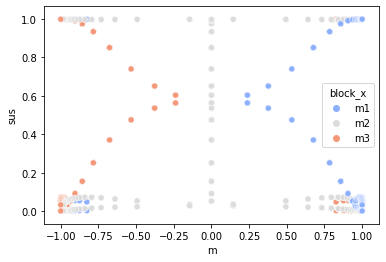

In [4]:
sns.scatterplot(data=all_mags,x='m',y='sus',hue='block_x',palette='coolwarm')

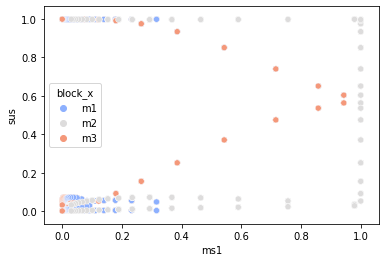

In [5]:
all_mags['ms1']=1.0-all_mags['m']**2
sns.scatterplot(data=all_mags,x='ms1',y='sus',hue='block_x',palette='coolwarm')

## State clustering as a function of $\beta$

We will maintain cluster labels by using the average magnetisation assoiciated with the cluster. This gives some degree of fuzzyness near the bifurcation points. However, it is sufficient for plotting purposes.

In [6]:
beta_factor=3.125
this_beta_data=data.loc[data['beta_factor']==beta_factor]
X=this_beta_data[['m1','m2','m3']].values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_means = [ round(np.mean(k),2) for k in kmeans.cluster_centers_ ]
cluster_sort_df=pd.DataFrame({'cluster_mean_mag':cluster_means}).sort_values(by='cluster_mean_mag')
cluster_sort_df['cluster_mag_rank']=np.arange(0,len(cluster_sort_df),1)
cluster_sort_df.head()

,cluster_mean_mag,cluster_mag_rank
1,-0.94,0
2,-0.29,1
0,0.29,2
3,0.94,3


In [7]:

# To do: re-run this cluster after clusters at 2DP has been computed.
# Or combine the mag rank and clusts at 2DP labels to get this?

all_beta_data=pd.DataFrame()
for beta_factor in sorted(list(set(data['beta_factor'].to_list()))) :

    this_beta_data=data.loc[data['beta_factor']==beta_factor]
    X=this_beta_data[['m1','m2','m3']].values

    kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

    cluster_means = [ round(np.mean(k),2) for k in kmeans.cluster_centers_ ]
    cluster_sort_df=pd.DataFrame({'cluster_mean_mag':cluster_means}).sort_values(by='cluster_mean_mag')
    cluster_sort_df['cluster_mag_rank']=np.arange(0,len(cluster_sort_df),1)

    this_beta_data['labels']=kmeans.labels_
    this_beta_data['cluster_mean_mag']=[ round( np.mean(kmeans.cluster_centers_[p]),2) for p in kmeans.labels_]
    # must label by rank of cluster mean mag value?
    this_beta_data = this_beta_data.merge(cluster_sort_df,on='cluster_mean_mag',how='left')
    
    all_beta_data=all_beta_data.append(this_beta_data)

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [8]:
clust_count_df=all_beta_data.groupby('beta_factor').agg({'cluster_mean_mag':'nunique'}).reset_index().rename(columns={'cluster_mean_mag':'clusts_at_2dp'})
clust_count_df.head()

,beta_factor,clusts_at_2dp
0,0.5000,1
1,0.6875,1
2,0.8750,1
3,1.0625,1
4,1.2500,1


In [9]:
all_beta_data=all_beta_data.merge(clust_count_df,on='beta_factor',how='left')

In [10]:
all_beta_data.head()

,Unnamed: 0,beta_factor,init_cond,magnetisation,m1,m2,m3,susB1,susB2,susB3,m_fp_convergence,labels,cluster_mean_mag,cluster_mag_rank,clusts_at_2dp
0,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,0,1
1,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,1,1
2,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,2,1
3,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0,0.0,3,1
4,0,0.5,"[0.384052666852587, 0.6377274747048265, 0.8168...",0.000003,0.238117,0.000003,-0.23811,0.56352,0.604059,0.563523,"[0.6128635516169163, 0.23354477902160176, 0.08...",0,0.0,0,1


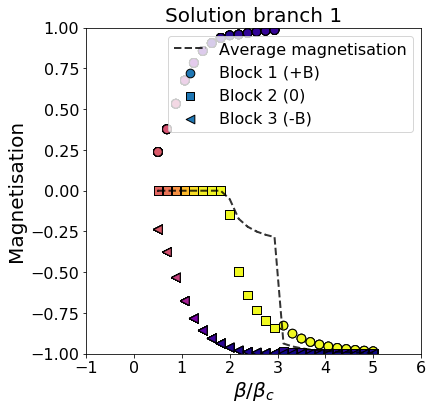

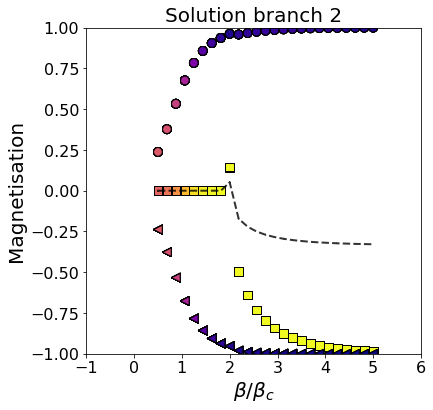

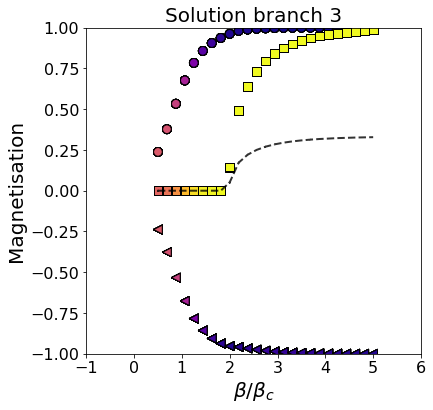

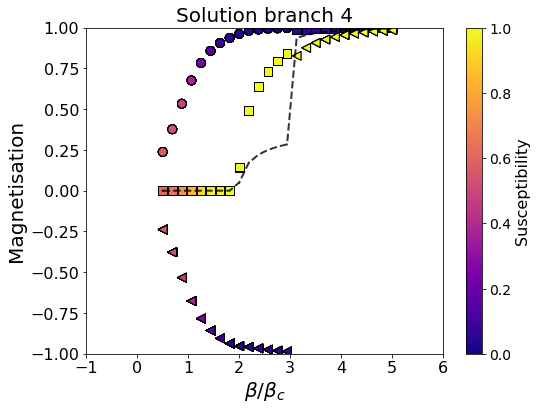

In [23]:
#cluster=1

for cluster in [0,1,2,3]:
    only_one=all_beta_data.loc[all_beta_data['cluster_mag_rank']==cluster]
    bfs=only_one['beta_factor'].to_list()
    m1=only_one['m1'].to_list()
    m2=only_one['m2'].to_list()
    m3=only_one['m3'].to_list()
    mean_mag=only_one['magnetisation'].to_list()

    sus_1=only_one['susB1'].to_list()
    sus_2=only_one['susB2'].to_list()
    sus_3=only_one['susB3'].to_list()
    all_sus=list(np.concatenate((sus_1,sus_2,sus_3)))

    import matplotlib
    import matplotlib.cm as cm

    #minima = min(all_sus)
    #maxima = max(all_sus)
    # use the same norm for all plots:
    minima=0.0
    maxima=1.0

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

    if cluster==3:
        fig,ax=plt.subplots(figsize=(8,6))
    else :
        fig,ax=plt.subplots(figsize=(6,6))
    
    
    #plt.title("Optimal block to target for a MS is the one with lowest absolute mag")
    plt.title(f"Solution branch {cluster+1}",fontsize=20)

    ax.scatter(bfs,m1,c=sus_1,cmap='plasma',norm=norm,marker='o',label='Block 1 (+B)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,m2,c=sus_2,cmap='plasma',norm=norm,marker='s',label='Block 2 (0)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,m3,c=sus_3,cmap='plasma',norm=norm,marker='<',label='Block 3 (-B)',linewidths=1.0,edgecolors='k',s=75)
    
    plt.plot(bfs,mean_mag,'k--',label='Average magnetisation',lw=2.0,alpha=0.8)

    if cluster == 0 :
        plt.legend(loc='upper right',fontsize=16)
    
    plt.xlim(-1,6)
    plt.ylim(-1,1)

    plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
    plt.ylabel("Magnetisation",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.text(0.45,0.95,'(c)',fontsize=25)

    if cluster == 3 :
        cbar=plt.colorbar(mapper, ax=ax)
        cbar.ax.set_ylabel('Susceptibility', rotation=90,fontsize=16)
        cbar.ax.tick_params(labelsize=14) 
    
    
    plt.savefig(f"Plots/sus_on_block_phase_sol_{cluster+1}" + ".jpg",bbox_inches='tight')

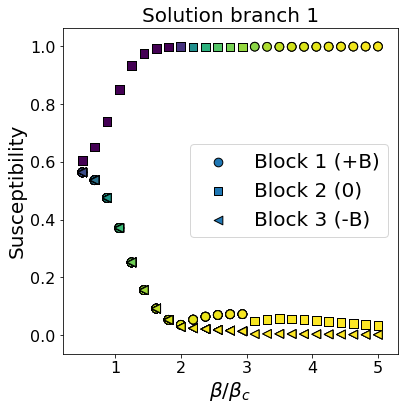

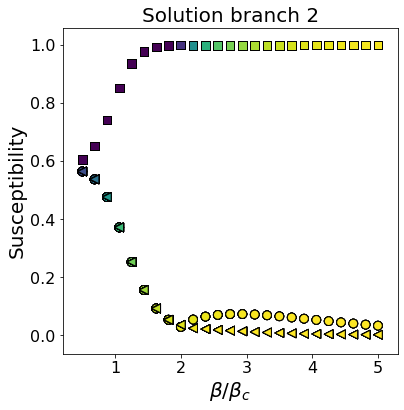

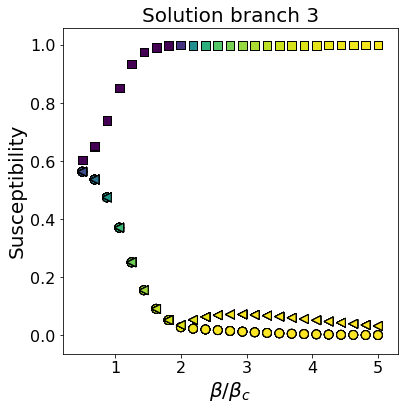

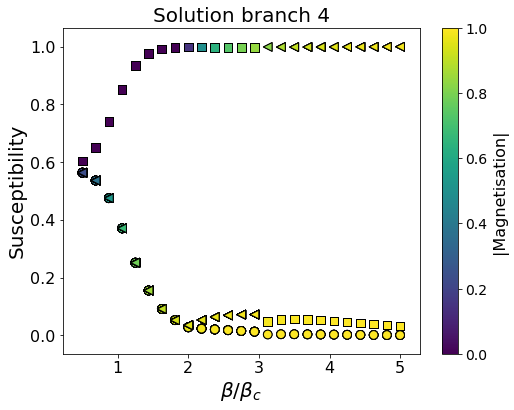

In [31]:
for cluster in [0,1,2,3]:
    only_one=all_beta_data.loc[all_beta_data['cluster_mag_rank']==cluster]
    bfs=only_one['beta_factor'].to_list()
    m1=[abs(k) for k in only_one['m1'].to_list()]
    m2=[abs(k) for k in only_one['m2'].to_list()]
    m3=[abs(k) for k in only_one['m3'].to_list()]
    mean_mag=only_one['magnetisation'].to_list()

    sus_1=only_one['susB1'].to_list()
    sus_2=only_one['susB2'].to_list()
    sus_3=only_one['susB3'].to_list()
    all_sus=list(np.concatenate((sus_1,sus_2,sus_3)))
    
    
    minima=0.0
    maxima=1.0
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
    
    if cluster==3:
        fig,ax=plt.subplots(figsize=(8,6))
    else :
        fig,ax=plt.subplots(figsize=(6,6))
    
    #plt.title("Optimal block to target for a MS is the one with lowest absolute mag")
    plt.title(f"Solution branch {cluster+1}",fontsize=20)
    
    #plt.plot(bfs,sus_1,label='block 1 (+VE)')
    #plt.plot(bfs,sus_2,label='block 2 (0 field)')
    #plt.plot(bfs,sus_3,label='block 3 (0 field)')
    
    ax.scatter(bfs,sus_1,c=m1,cmap='viridis',norm=norm,marker='o',label='Block 1 (+B)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,sus_2,c=m2,cmap='viridis',norm=norm,marker='s',label='Block 2 (0)',linewidths=1.0,edgecolors='k',s=75)
    ax.scatter(bfs,sus_3,c=m3,cmap='viridis',norm=norm,marker='<',label='Block 3 (-B)',linewidths=1.0,edgecolors='k',s=75)
    
    
    plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
    plt.ylabel("Susceptibility",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    if cluster==0:
        plt.legend(loc='center right',fontsize=20)
        
    if cluster == 3 :
        cbar=plt.colorbar(mapper, ax=ax)
        cbar.ax.set_ylabel('|Magnetisation|', rotation=90,fontsize=16)
        cbar.ax.tick_params(labelsize=14) 
    
    plt.savefig(f"Plots/block_sus_phase_sol_{cluster+1}" + ".jpg",bbox_inches='tight')
    
    
    #ax.scatter(bfs,m1,c=sus_1,cmap='coolwarm',norm=norm,marker='o',label='block 1 (+VE)')
    #ax.scatter(bfs,m2,c=sus_2,cmap='coolwarm',norm=norm,marker='s',label='block 2 (0 field)')
    #ax.scatter(bfs,m3,c=sus_3,cmap='coolwarm',norm=norm,marker='<',label='block 3 (0 field)')

In [ ]:
sns.scatterplot(data=only_one,x='m1',y='susB1')
sns.scatterplot(data=only_one,x='m2',y='susB2')
sns.scatterplot(data=only_one,x='m3',y='susB3')

## Explicit susceptibility

In [ ]:
#from tqdm import tqdm as tqdm
import numpy as np
import pandas as pd
import networkx as nx

from ising_block_level_influence import N_Block_sbm_class as NBlock
from spatial_spin_monte_carlo import spatial_spin_monte_carlo as Spins


def block_system_param_save(block_system,fname) :
    parameters={}
    parameters["$\gamma_{\mathrm{block}}$"]=block_system.gamma
    parameters["$\\tau_{\mathrm{block}}$"] = block_system.tol
    parameters['$\epsilon_{\mathrm{block}}$'] = block_system.mf_iim_step_size
    parameters['$a_{\mathrm{block}}$'] = block_system.mf_iim_tolerance
    param_df = pd.DataFrame({'Parameter' : list(parameters.keys()), 'Value' : list(parameters.values())} )
    param_df.to_csv(fname,index=False)

#Parameters:
coupling_matrix=np.asarray([[10.0, 2.5,0.0], [2.5, 7.5 ,2.5],[0.0,2.5,10.0 ]])
block_sizes=[400,400,400]
B=5.0
block_background_field=np.asarray([B,0.0,-B])


block_system = NBlock.block_mf_ising_system(coupling_matrix,block_sizes,block_background_field)

#Computing the critical temp through a sampled SBM
#Allows us to mathc up values with the phase diagram
#plot
sbm_graph=block_system.make_sbm()
#beta_c = Spins.crit_beta(nx.from_numpy_matrix(coupling_matrix))
beta_c = Spins.crit_beta(sbm_graph)


#Fixed point iteration parameters:
block_system.gamma=1.0
block_system.tol=1E-5 #Was 10^{-10}???
block_system.max_mf_fp_iterations=10000
block_system.mf_fp_init_state=np.ones(len(block_system.block_sizes))
block_system.mf_fp_noisy=False

#IIM parameters
block_system.max_mf_iim_iterations=1000
block_system.mf_iim_step_size=1.0
block_system.mf_iim_tolerance=1E-10
block_system.mf_iim_init_control='uniform'
block_system.mf_iim_noisy=False

H_Vals = [10**k for k in np.linspace(1.5,4.5,25)]
beta_f_vals = [ 5.0,2.5,1.0]

block_cont_data= pd.DataFrame()

num_block_betas=25
beta_f_vals = np.linspace(0.5, 5.0, num_block_betas)

#beta_f_vals = [ 1.0,2.5,5.0]

Init_state_samps=25

block_system.mf_fp_init_state=np.random.uniform(-1.0,1.0,3)


#for beta_factor in tqdm(beta_f_vals,position=1) :
beta_factor=3.0

beta=beta_c*beta_factor

A=nx.to_numpy_matrix(block_system.graph)
m, m_seq=block_system.mf_magnetization(block_background_field ,beta,return_sequence=True)
sus_vec=block_system.mf_magnetization_gradient(m,beta)

In [ ]:
print(m)
print(sus_vec)
plt.plot(m,sus_vec,'bo')

### Other content

In [ ]:
sns.scatterplot(data=all_beta_data,x='beta_factor',y='magnetisation',hue='cluster_mag_rank',palette='coolwarm')

In [ ]:
only_one=all_beta_data.loc[all_beta_data['cluster_mag_rank']==2]
fig,ax=plt.subplots(figsize=(8,8))
# Need to use common colourmap.
sns.scatterplot(data=only_one,x='beta_factor',y='m1',hue='susB1',palette='coolwarm')
sns.scatterplot(data=only_one,x='beta_factor',y='m2',hue='susB2',palette='coolwarm')
sns.scatterplot(data=only_one,x='beta_factor',y='m3',hue='susB3',palette='coolwarm')
# Claim: sus is always largest for the block closest to zero.
# But there are also discrete jumps due to MS states.

In [ ]:
#>>> kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
>>> kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
>>> kmeans.cluster_centers_

In [ ]:
data.groupby(['beta_factor']).agg({'magnetisation':'mean'}).reset_index()

In [ ]:
plt.hist( data.loc[data['beta_factor']==5.0]['magnetisation'].to_list() )

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(data=data,x='beta_factor',y='m1',hue='susB1',palette='coolwarm')
sns.scatterplot(data=data,x='beta_factor',y='m2',hue='susB2',palette='coolwarm')
sns.scatterplot(data=data,x='beta_factor',y='m3',hue='susB3',palette='coolwarm')

In [ ]:
data['m1-1']=1.0-data['m1']**2
data['m2-1']=1.0-data['m2']**2
data['m3-1']=1.0-data['m3']**2

fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(data=data,x='beta_factor',y='m1-1',hue='susB1',palette='coolwarm')
sns.scatterplot(data=data,x='beta_factor',y='m2-1',hue='susB2',palette='coolwarm')
sns.scatterplot(data=data,x='beta_factor',y='m3-1',hue='susB3',palette='coolwarm')

In [ ]:
beta_factors=data['beta_factor'].to_list()

# For each beta get the largest magnetisation of each block to get top metastable state

In [ ]:
top_metastable = data.groupby(['beta_factor']).agg({'m1':max,'m2':max,'m3':max})
top_metastable

In [ ]:
melted=pd.melt(data,id_vars=['beta_factor'],value_vars=['m1','m2','m3'],var_name='block',value_name='m')
# pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]

In [ ]:
sns.scatterplot(data=melted,

In [ ]:
melted=pd.melt(data,id_vars=['beta_factor'],value_vars=['susB1','susB2','susB3'],var_name='block',value_name='m')

In [ ]:
melted